# Time Differences

This report asks:
1. as time goes on, when candidate A gets more votes, does candidate B also get more votes?
1. As time goes on, how do the candidates perform relative to each other?


In [80]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# SAN MATEO

In [18]:
dates = ['09', '10', '13', '15', '17', '21', '23']
title = "U.S. Representative, 16th District"

In [16]:
cumdf = pd.DataFrame()
initialized = False
for date in dates:
    df = pd.read_excel("data/voter_input_sm/San_Mateo_June{}.xlsx".format(date))
    df = df[df['Contest_title']==title]
    df = df[['Precinct_name', 'Turn_Out', 'Contest_title', 'candidate_name', 'total_votes', 'Vote Centers_votes', 'Vote by Mail_votes']]
    #print(df.head())
    if not initialized:
        cumdf['candidate_name'] = df['candidate_name']
        initialized = True
    cumdf['6/{} Cumulative Votes'.format(date)] = df['total_votes']

In [17]:
cumdf = cumdf.groupby("candidate_name").sum()
cumdf.sort_values(by = ['candidate_name'], inplace = True)

In [6]:
cumdf.to_csv('data/San_Mateo_Cumulative.csv')

In [19]:
#start here
cumdf = pd.read_csv('data/San_Mateo_Cumulative.csv')
cumdf.sort_values(by = ['candidate_name'], inplace = True)
cumdf = cumdf.groupby("candidate_name").sum()
cumdf.sort_values(by = ['candidate_name'], inplace = True)

In [19]:
cumdf.index

Index(['AJWANG RADING', 'ANNA G. ESHOO', 'BENJAMIN THOMAS SOLOMON',
       'GREG LIN TANAKA', 'JOHN KARL FREDRICH', 'PETER OHTAKI',
       'RICHARD B. FOX', 'RISHI KUMAR', 'TRAVIS ANDREW ODEKIRK'],
      dtype='object', name='candidate_name')

## SUCCESS RELATIVE TO ANNA

One thing to note for this and the rest of this report is that relative positions don't really change; The first place winner on day one stays the first place winner, as well as the other places.

In [20]:
second_row = cumdf.iloc[[1]].values[0]

In [21]:
second_row

array([ 7541,  9185, 14154, 16446, 18600, 19248, 19262], dtype=int64)

In [22]:
reldf = cumdf.apply(lambda row: row - second_row, axis=1)

In [23]:
reldf

,6/09 Cumulative Votes,6/10 Cumulative Votes,6/13 Cumulative Votes,6/15 Cumulative Votes,6/17 Cumulative Votes,6/21 Cumulative Votes,6/23 Cumulative Votes
candidate_name,,,,,,,
AJWANG RADING,-6876,-8353,-12672,-14649,-16467,-17045,-17058
ANNA G. ESHOO,0,0,0,0,0,0,0
BENJAMIN THOMAS SOLOMON,-7310,-8917,-13779,-16011,-18092,-18722,-18734
GREG LIN TANAKA,-6973,-8472,-12987,-15060,-16967,-17550,-17562
JOHN KARL FREDRICH,-7378,-8986,-13853,-16088,-18164,-18795,-18809
PETER OHTAKI,-5971,-7282,-11229,-12942,-14523,-15027,-15038
RICHARD B. FOX,-6458,-7893,-12290,-14297,-16135,-16714,-16725
RISHI KUMAR,-6367,-7719,-11771,-13587,-15279,-15807,-15819
TRAVIS ANDREW ODEKIRK,-7541,-9185,-14154,-16446,-18600,-19248,-19262


In [24]:
cumdf.to_csv("data/voter_input_sm/san_mateo_cumulative_votes.csv")
reldf.to_csv("data/voter_input_sm/san_mateo_cumulative_votes.csv")

<AxesSubplot:>

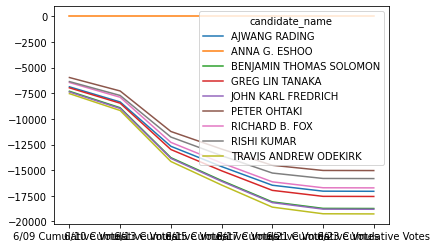

In [25]:
transpose = reldf.transpose()
transpose.plot()

In [26]:
#remove bottom 3 contenders
contenders = transpose.loc[:, ~transpose.columns.isin(['TRAVIS ANDREW ODEKIRK', 'JOHN KARL FREDRICH', 'BENJAMIN THOMAS SOLOMON'])]

<AxesSubplot:>

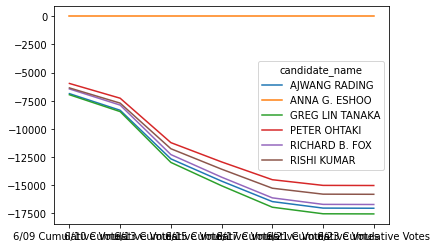

In [27]:
contenders.plot()

## NO ANNA ESHOO

<AxesSubplot:>

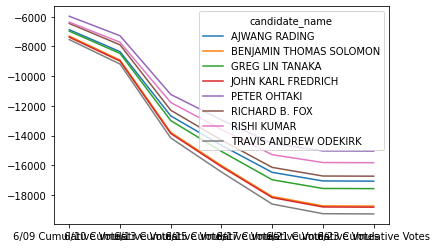

In [28]:
no_anna = transpose.loc[:, transpose.columns != 'ANNA G. ESHOO']
no_anna.plot()

In [29]:
cum_transpose = cumdf.transpose()

<AxesSubplot:>

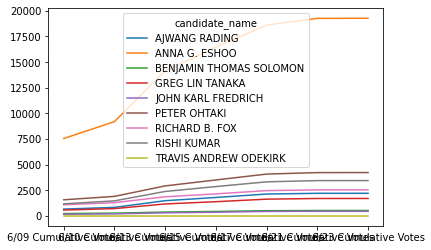

In [30]:
cum_transpose.plot()

# SANTA CLARA

In [31]:
scdf = pd.read_csv("data/Santa_Clara_Cumulative.csv")
scdf.rename(columns = lambda header: header.replace(" Total Votes", ""), inplace = True)
scdf = scdf.loc[:, scdf.columns != 'Unnamed: 0']
scdf.set_index('Date', drop = True, inplace = True)
scdf.head()

,ANNA G. ESHOO,RISHI KUMAR,PETER OHTAKI,RICHARD B. FOX,GREG LIN TANAKA,AJWANG RADING,BENJAMIN THOMAS SOLOMON,JOHN KARL FREDRICH,TRAVIS ANDREW ODEKIRK
Date,,,,,,,,,
2022-06-08,31941,11177,8615,5934,4330,3818,1200,846,0
2022-06-09,33301,11639,8982,6088,4535,4026,1219,882,0
2022-06-10,36704,13083,9943,6617,5027,4481,1335,970,0
2022-06-11,42956,15499,11609,7577,6115,5583,1504,1141,0
2022-06-12,49570,17977,13408,8532,7223,6790,1702,1338,0


In [32]:
def anna(row):
    return row - row['ANNA G. ESHOO']
scdf_rel = scdf.apply(anna, axis = 1)

In [33]:
scdf_rel

,ANNA G. ESHOO,RISHI KUMAR,PETER OHTAKI,RICHARD B. FOX,GREG LIN TANAKA,AJWANG RADING,BENJAMIN THOMAS SOLOMON,JOHN KARL FREDRICH,TRAVIS ANDREW ODEKIRK
Date,,,,,,,,,
2022-06-08,0,-20764,-23326,-26007,-27611,-28123,-30741,-31095,-31941
2022-06-09,0,-21662,-24319,-27213,-28766,-29275,-32082,-32419,-33301
2022-06-10,0,-23621,-26761,-30087,-31677,-32223,-35369,-35734,-36704
2022-06-11,0,-27457,-31347,-35379,-36841,-37373,-41452,-41815,-42956
2022-06-12,0,-31593,-36162,-41038,-42347,-42780,-47868,-48232,-49570
2022-06-13,0,-34046,-39170,-44752,-45881,-46272,-52090,-52489,-53932
2022-06-14,0,-37944,-43597,-49944,-51153,-51373,-58232,-58681,-60290
2022-06-15,0,-38546,-44334,-50797,-52040,-52248,-59267,-59716,-61368
2022-06-16,0,-38668,-44508,-50987,-52232,-52432,-59480,-59927,-61585


<AxesSubplot:xlabel='Date'>

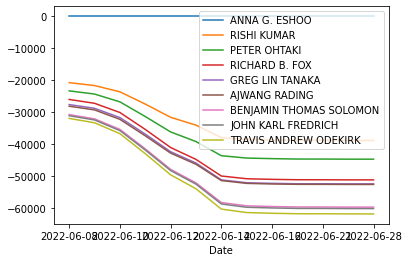

In [34]:
scdf_rel.plot()

# CORRELATION PLOTS

In [35]:
scdf.corr()

,ANNA G. ESHOO,RISHI KUMAR,PETER OHTAKI,RICHARD B. FOX,GREG LIN TANAKA,AJWANG RADING,BENJAMIN THOMAS SOLOMON,JOHN KARL FREDRICH,TRAVIS ANDREW ODEKIRK
ANNA G. ESHOO,1.000000,0.999941,0.999765,0.999290,0.999847,0.999328,0.999188,0.999863,0.873302
RISHI KUMAR,0.999941,1.000000,0.999865,0.999413,0.999865,0.999410,0.999384,0.999734,0.875177
PETER OHTAKI,0.999765,0.999865,1.000000,0.999734,0.999866,0.999750,0.999702,0.999565,0.882412
RICHARD B. FOX,0.999290,0.999413,0.999734,1.000000,0.999447,0.999633,0.999861,0.999245,0.890158
GREG LIN TANAKA,0.999847,0.999865,0.999866,0.999447,1.000000,0.999755,0.999418,0.999700,0.877403
AJWANG RADING,0.999328,0.999410,0.999750,0.999633,0.999755,1.000000,0.999667,0.999266,0.886558
BENJAMIN THOMAS SOLOMON,0.999188,0.999384,0.999702,0.999861,0.999418,0.999667,1.000000,0.999151,0.889439
JOHN KARL FREDRICH,0.999863,0.999734,0.999565,0.999245,0.999700,0.999266,0.999151,1.000000,0.873123
TRAVIS ANDREW ODEKIRK,0.873302,0.875177,0.882412,0.890158,0.877403,0.886558,0.889439,0.873123,1.000000


In [36]:
cum_transpose.corr()

candidate_name,AJWANG RADING,ANNA G. ESHOO,BENJAMIN THOMAS SOLOMON,GREG LIN TANAKA,JOHN KARL FREDRICH,PETER OHTAKI,RICHARD B. FOX,RISHI KUMAR,TRAVIS ANDREW ODEKIRK
candidate_name,,,,,,,,,
AJWANG RADING,1.000000,0.999241,0.998410,0.999774,0.997435,0.999683,0.999640,0.999850,NaN
ANNA G. ESHOO,0.999241,1.000000,0.996532,0.999198,0.995012,0.998741,0.999405,0.999562,NaN
BENJAMIN THOMAS SOLOMON,0.998410,0.996532,1.000000,0.999030,0.999822,0.999286,0.998656,0.998408,NaN
GREG LIN TANAKA,0.999774,0.999198,0.999030,1.000000,0.998180,0.999826,0.999890,0.999857,NaN
JOHN KARL FREDRICH,0.997435,0.995012,0.999822,0.998180,1.000000,0.998511,0.997733,0.997322,NaN
PETER OHTAKI,0.999683,0.998741,0.999286,0.999826,0.998511,1.000000,0.999715,0.999781,NaN
RICHARD B. FOX,0.999640,0.999405,0.998656,0.999890,0.997733,0.999715,1.000000,0.999869,NaN
RISHI KUMAR,0.999850,0.999562,0.998408,0.999857,0.997322,0.999781,0.999869,1.000000,NaN
TRAVIS ANDREW ODEKIRK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#translate to percentages
sc_temp = scdf.transpose()
sc_temp = sc_temp/sc_temp.sum()
scdf_pc = sc_temp.transpose()
smdf_pc = cumdf/cumdf.sum()
smdf_pc = smdf_pc.transpose()

## Santa Clara Correlation Plot with Eshoo

In [38]:
corr = scdf_pc.corr()
corr.style.background_gradient(cmap='coolwarm')

,ANNA G. ESHOO,RISHI KUMAR,PETER OHTAKI,RICHARD B. FOX,GREG LIN TANAKA,AJWANG RADING,BENJAMIN THOMAS SOLOMON,JOHN KARL FREDRICH,TRAVIS ANDREW ODEKIRK
ANNA G. ESHOO,1.000000,-0.925549,-0.101949,0.932499,-0.977354,-0.990192,0.926684,0.725258,-0.903594
RISHI KUMAR,-0.925549,1.000000,-0.124048,-0.976925,0.952866,0.939469,-0.968981,-0.666280,0.713682
PETER OHTAKI,-0.101949,-0.124048,1.000000,0.182663,-0.085622,-0.013488,0.198418,-0.480134,0.415939
RICHARD B. FOX,0.932499,-0.976925,0.182663,1.000000,-0.981339,-0.966100,0.995396,0.599798,-0.711698
GREG LIN TANAKA,-0.977354,0.952866,-0.085622,-0.981339,1.000000,0.995767,-0.978957,-0.647226,0.808580
AJWANG RADING,-0.990192,0.939469,-0.013488,-0.966100,0.995767,1.000000,-0.962989,-0.662654,0.855559
BENJAMIN THOMAS SOLOMON,0.926684,-0.968981,0.198418,0.995396,-0.978957,-0.962989,1.000000,0.591386,-0.716965
JOHN KARL FREDRICH,0.725258,-0.666280,-0.480134,0.599798,-0.647226,-0.662654,0.591386,1.000000,-0.737934
TRAVIS ANDREW ODEKIRK,-0.903594,0.713682,0.415939,-0.711698,0.808580,0.855559,-0.716965,-0.737934,1.000000


## NO ANNA ESHOO

In [39]:
scdf_noanna = scdf.loc[:, ~scdf.columns.isin(['ANNA G. ESHOO', 'TRAVIS ANDREW ODEKIRK'])]
smdf_noanna = cum_transpose.loc[:, ~cum_transpose.columns.isin(['ANNA G. ESHOO', 'TRAVIS ANDREW ODEKIRK'])]

## San Mateo Correlation Plot

In [40]:
smdf_temp = smdf_noanna.transpose()
smdf_pc = smdf_temp/smdf_temp.sum()
smdf_pc = smdf_pc.transpose()
smdf_pc = smdf_pc.reindex(sorted(smdf_pc.columns), axis=1)
sm_corr = smdf_pc.corr()
sm_corr.style.background_gradient(cmap='coolwarm')

candidate_name,AJWANG RADING,BENJAMIN THOMAS SOLOMON,GREG LIN TANAKA,JOHN KARL FREDRICH,PETER OHTAKI,RICHARD B. FOX,RISHI KUMAR
candidate_name,,,,,,,
AJWANG RADING,1.000000,-0.986487,0.979275,-0.155659,-0.942233,-0.994658,0.975219
BENJAMIN THOMAS SOLOMON,-0.986487,1.000000,-0.982842,0.252526,0.965293,0.979549,-0.997780
GREG LIN TANAKA,0.979275,-0.982842,1.000000,-0.115033,-0.961303,-0.980948,0.976380
JOHN KARL FREDRICH,-0.155659,0.252526,-0.115033,1.000000,0.332782,0.081067,-0.289283
PETER OHTAKI,-0.942233,0.965293,-0.961303,0.332782,1.000000,0.917431,-0.962358
RICHARD B. FOX,-0.994658,0.979549,-0.980948,0.081067,0.917431,1.000000,-0.968947
RISHI KUMAR,0.975219,-0.997780,0.976380,-0.289283,-0.962358,-0.968947,1.000000


## Santa Clara Correlation Plot

In [41]:
scdf_temp = scdf_noanna.transpose()
scdf_pc = scdf_temp/scdf_temp.sum()
scdf_pc = scdf_pc.transpose()
scdf_pc = scdf_pc.reindex(sorted(scdf_pc.columns), axis=1)
sc_corr = scdf_pc.corr()
sc_corr.style.background_gradient(cmap='coolwarm')

,AJWANG RADING,BENJAMIN THOMAS SOLOMON,GREG LIN TANAKA,JOHN KARL FREDRICH,PETER OHTAKI,RICHARD B. FOX,RISHI KUMAR
AJWANG RADING,1.000000,-0.981723,0.988206,-0.921837,-0.980810,-0.984038,0.359718
BENJAMIN THOMAS SOLOMON,-0.981723,1.000000,-0.992682,0.886654,0.979745,0.996868,-0.512795
GREG LIN TANAKA,0.988206,-0.992682,1.000000,-0.883137,-0.989365,-0.992665,0.452070
JOHN KARL FREDRICH,-0.921837,0.886654,-0.883137,1.000000,0.865590,0.894183,-0.281442
PETER OHTAKI,-0.980810,0.979745,-0.989365,0.865590,1.000000,0.979987,-0.450235
RICHARD B. FOX,-0.984038,0.996868,-0.992665,0.894183,0.979987,1.000000,-0.514827
RISHI KUMAR,0.359718,-0.512795,0.452070,-0.281442,-0.450235,-0.514827,1.000000


# SOME EXPERIMENTATION

Since it has more or less been established that the rankings wont change, this makes comparing how they compare against one another easier. I will be tracking how the the gaps between each candidate change based on their win percentage, since if it were based on raw numbers it should always increase.

For example, if the table was to look like


| Date | A | B | C |
| :-: | :-: | :-: | :-: |
| 6/20 | 2 | 3 | 5 | 
| 6/22| 2 | 8 | 10 |
| 6/24 | 6 | 9 | 15 | 

The result should be

| Dates | B-A | C-B | 
| :-: | :-: | :-: | 
| 6/22 - 6/20 | +10% | -10% | 
| 6/24 - 6/22| -10% | +10% | 



Let's jump into it.

I'm going to first rearrange the columns in San Mateo to reflect on who was the winner, as it is already done in scdf

In [42]:
scdf_pc.columns

Index(['AJWANG RADING', 'BENJAMIN THOMAS SOLOMON', 'GREG LIN TANAKA',
       'JOHN KARL FREDRICH', 'PETER OHTAKI', 'RICHARD B. FOX', 'RISHI KUMAR'],
      dtype='object')

In [71]:
smdf_pc = cumdf/cumdf.sum()
smdf_pc = smdf_pc.transpose()
smdf_pc = smdf_pc[['ANNA G. ESHOO', 'PETER OHTAKI', 'RISHI KUMAR', 'RICHARD B. FOX',
       'AJWANG RADING','GREG LIN TANAKA',  'BENJAMIN THOMAS SOLOMON',
       'JOHN KARL FREDRICH', 'TRAVIS ANDREW ODEKIRK']]

sc_temp = scdf.transpose()
sc_temp = sc_temp/sc_temp.sum()
scdf_pc = sc_temp.transpose()

In [72]:
sc_cascade = pd.DataFrame()
sm_cascade = pd.DataFrame()

We will next find the difference between each candidate and put it into new dataframes.

In [73]:
sc_columns = scdf_pc.columns.tolist()
for i in range(len(sc_columns)-1):
    winner = sc_columns[i]
    loser = sc_columns[i+1]
    sc_cascade[winner.split(" ")[-1] + "/" + loser.split(" ")[-1]] = scdf_pc[winner] - scdf_pc[loser]
sc_cascade.reindex(scdf_pc.index)
sm_columns = smdf_pc.columns.tolist()
for i in range(len(sm_columns)-1):
    winner = sm_columns[i]
    loser = sm_columns[i+1]
    sm_cascade[winner.split(" ")[-1] + "/" + loser.split(" ")[-1]] = smdf_pc[winner] - smdf_pc[loser]
sm_cascade.reindex(smdf_pc.index)

,ESHOO/OHTAKI,OHTAKI/KUMAR,KUMAR/FOX,FOX/RADING,RADING/TANAKA,TANAKA/SOLOMON,SOLOMON/FREDRICH,FREDRICH/ODEKIRK
6/09 Cumulative Votes,0.459484,0.030473,0.007003,0.032166,0.007464,0.025933,0.005233,0.012543
6/10 Cumulative Votes,0.459200,0.027557,0.010972,0.029007,0.007504,0.028062,0.004351,0.012549
6/13 Cumulative Votes,0.455519,0.021987,0.021054,0.015496,0.012778,0.032129,0.003002,0.012210
6/15 Cumulative Votes,0.447294,0.022292,0.024539,0.012166,0.014205,0.032868,0.002661,0.012373
6/17 Cumulative Votes,0.437796,0.022790,0.025804,0.010008,0.015072,0.033913,0.002170,0.013143
6/21 Cumulative Votes,0.437799,0.022725,0.026425,0.009643,0.014713,0.034145,0.002127,0.013198
6/23 Cumulative Votes,0.437775,0.022736,0.026375,0.009694,0.014672,0.034118,0.002183,0.013187


In [74]:
sm_cascade.index = sm_cascade.index.str.replace(" Cumulative Votes", "/2022")


In [75]:
sm_cascade = sm_cascade.diff()

<AxesSubplot:>

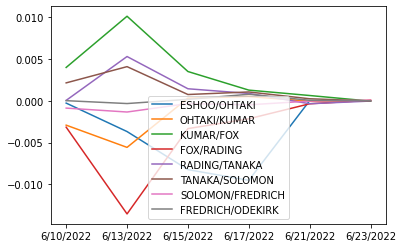

In [76]:
sm_cascade.plot()

In [77]:
sc_cascade = sc_cascade.diff()

<AxesSubplot:xlabel='Date'>

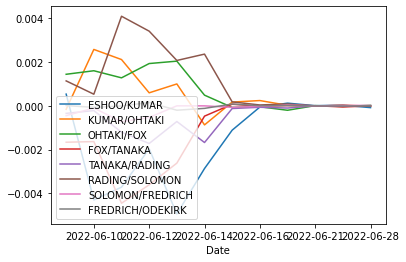

In [79]:
sc_cascade.plot()

# Mail in Ballots Correlation

We will be doing the same correlation plots, but this time factoring in mail in ballots to see if there was a correlation to approximately when they mailed it in.

In [66]:
mail= pd.read_csv('data/mail-time.csv')
mail = mail.loc[:, mail.columns!='TRAVIS ANDREW ODEKIRK']

In [67]:
mail = mail[['candidate name','ANNA G. ESHOO', 'PETER OHTAKI', 'RISHI KUMAR', 'RICHARD B. FOX',
       'AJWANG RADING','GREG LIN TANAKA',  'BENJAMIN THOMAS SOLOMON',
       'JOHN KARL FREDRICH']]
mail.set_index('candidate name', inplace = True)

In [57]:
temp = mail.loc[:, mail.columns!='ANNA G. ESHOO']
temp = temp.reindex(sorted(temp.columns), axis=1)
temp = temp.transpose()
temp = temp/temp.sum()
mail_pc = temp.transpose()

In [58]:
mail_corr = mail_pc.corr()
mail_corr.style.background_gradient(cmap='coolwarm')

,AJWANG RADING,BENJAMIN THOMAS SOLOMON,GREG LIN TANAKA,JOHN KARL FREDRICH,PETER OHTAKI,RICHARD B. FOX,RISHI KUMAR
AJWANG RADING,1.000000,-0.106820,-0.079739,-0.030944,-0.212595,0.092908,-0.570797
BENJAMIN THOMAS SOLOMON,-0.106820,1.000000,0.764290,-0.359936,-0.845189,0.864292,-0.582446
GREG LIN TANAKA,-0.079739,0.764290,1.000000,0.165865,-0.875468,0.891052,-0.667344
JOHN KARL FREDRICH,-0.030944,-0.359936,0.165865,1.000000,0.147136,-0.062769,-0.134358
PETER OHTAKI,-0.212595,-0.845189,-0.875468,0.147136,1.000000,-0.942239,0.741046
RICHARD B. FOX,0.092908,0.864292,0.891052,-0.062769,-0.942239,1.000000,-0.786667
RISHI KUMAR,-0.570797,-0.582446,-0.667344,-0.134358,0.741046,-0.786667,1.000000


However, this is very different from our previous correlation plots, which did not factor in mail in ballots.

Thus, I will find the differences in correlations, with each having a range of $(-2,2)$. For example, if in the previous plot a correlation was calculated to be 0.8, and in this plot the correlation was found to be -0.9, the difference would be -1.7

In [59]:
diff = sm_corr.subtract(mail_corr)
diff.style.background_gradient(cmap='PuOr')

candidate_name,AJWANG RADING,BENJAMIN THOMAS SOLOMON,GREG LIN TANAKA,JOHN KARL FREDRICH,PETER OHTAKI,RICHARD B. FOX,RISHI KUMAR
candidate_name,,,,,,,
AJWANG RADING,0.000000,-0.879667,1.059014,-0.124715,-0.729638,-1.087566,1.546016
BENJAMIN THOMAS SOLOMON,-0.879667,0.000000,-1.747132,0.612463,1.810482,0.115256,-0.415334
GREG LIN TANAKA,1.059014,-1.747132,0.000000,-0.280897,-0.085835,-1.872001,1.643724
JOHN KARL FREDRICH,-0.124715,0.612463,-0.280897,0.000000,0.185646,0.143837,-0.154925
PETER OHTAKI,-0.729638,1.810482,-0.085835,0.185646,0.000000,1.859670,-1.703404
RICHARD B. FOX,-1.087566,0.115256,-1.872001,0.143837,1.859670,0.000000,-0.182280
RISHI KUMAR,1.546016,-0.415334,1.643724,-0.154925,-1.703404,-0.182280,0.000000


# Change in Gaps over Time

This will be the same relative performance, but this time factoring in mail in ballots.

In [87]:
mail_cascade = pd.DataFrame()

In [88]:
temp = mail.transpose()
temp = temp/temp.sum()
maildiff_pc = temp.transpose()

In [89]:
mail_columns = maildiff_pc.columns.tolist()
for i in range(len(mail_columns)-1):
    winner = mail_columns[i]
    loser = mail_columns[i+1]
    mail_cascade[winner.split(" ")[-1] + "/" + loser.split(" ")[-1]] = maildiff_pc[winner] - maildiff_pc[loser]
mail_cascade.reindex(mail.index)

,ESHOO/OHTAKI,OHTAKI/KUMAR,KUMAR/FOX,FOX/RADING,RADING/TANAKA,TANAKA/SOLOMON,SOLOMON/FREDRICH
candidate name,,,,,,,
6/5/22,0.473126,0.013626,0.024981,-0.023467,0.066616,0.007570,0.011355
6/6/22,0.506783,0.014043,0.020921,0.023691,0.002770,0.030665,0.001815
6/7/22,0.468774,0.005397,0.031226,0.023130,-0.001928,0.038936,0.000771
6/9/22,0.460432,0.000799,0.047962,-0.074341,0.095923,0.021583,0.007194
6/10/22,0.446964,0.013789,0.037788,0.001989,0.010077,0.042429,-0.000530
6/11/22,0.316726,0.069395,0.039146,-0.094306,0.117438,0.024911,0.003559
6/12/22,0.411957,0.017935,0.045924,0.007609,0.006793,0.038859,0.000543
6/13/22,0.355311,0.095238,-0.014652,-0.014652,0.054945,0.010989,0.018315
6/14/22,0.374181,0.021432,0.037821,-0.004034,0.018659,0.043116,-0.002521


I don't trust this data just by looking at it. I'm going to try cumulative instead.

In [90]:
mail_cum = mail.cumsum()
temp = mail_cum.transpose()
temp = temp/temp.sum()
mailcum_pc = temp.transpose()

In [91]:
mail_columns = mailcum_pc.columns.tolist()
for i in range(len(mail_columns)-1):
    winner = mail_columns[i]
    loser = mail_columns[i+1]
    mail_cascade[winner.split(" ")[-1] + "/" + loser.split(" ")[-1]] = mailcum_pc[winner] - mailcum_pc[loser]
mail_cascade.reindex(mail.index)

,ESHOO/OHTAKI,OHTAKI/KUMAR,KUMAR/FOX,FOX/RADING,RADING/TANAKA,TANAKA/SOLOMON,SOLOMON/FREDRICH
candidate name,,,,,,,
6/5/22,0.473126,0.013626,0.024981,-0.023467,0.066616,0.007570,0.011355
6/6/22,0.503011,0.013996,0.021376,0.018407,0.009925,0.028077,0.002884
6/7/22,0.496837,0.012445,0.023152,0.019259,0.007787,0.030035,0.002503
6/9/22,0.493924,0.011513,0.025138,0.011769,0.014839,0.029359,0.002878
6/10/22,0.478642,0.012254,0.029254,0.008586,0.013290,0.033612,0.001769
6/11/22,0.474808,0.013607,0.029489,0.006150,0.015755,0.033406,0.001811
6/12/22,0.466372,0.014188,0.031695,0.006346,0.014552,0.034138,0.001641
6/13/22,0.465278,0.014987,0.031238,0.006139,0.014951,0.033910,0.001806
6/14/22,0.453865,0.015794,0.032062,0.004865,0.015415,0.035063,0.001264


In [93]:
mail_cascade = mail_cascade.diff()

<AxesSubplot:xlabel='candidate name'>

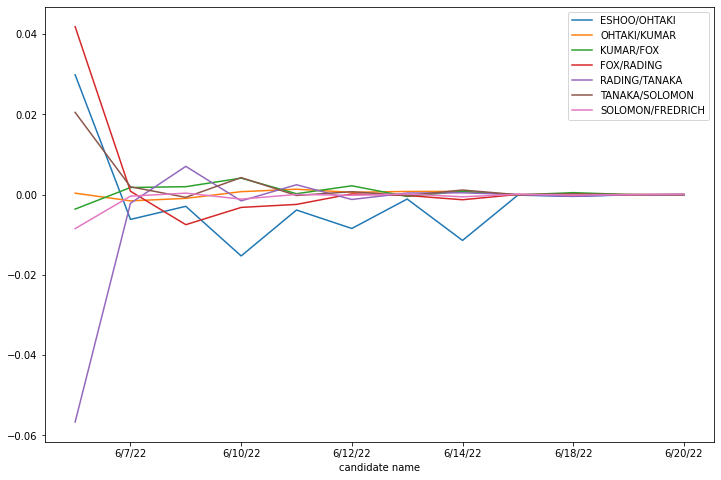

In [96]:
plt.rcParams["figure.figsize"] = (12,8)
mail_cascade.plot()

What does the graph mean? If we assume that there are never any changes in leads, all the lines should be flat and horizontal. However, if the line
1. starts positive and goes down, the lead increased, and then plateaued
2. starts positive and goes up, the lead keeps increasing
3. starts negative and goes down, the lead decreased, and then got even smaller
4. starts negative and goes up, the lead decreased, and then plateaued
5. starts neutral and then moves, the lead moves in said direction